### Goal:
### Explore the mpg dataset, clean data, perform analysis, and visualize results to understand car fuel efficiency factors.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load data
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### 4. Explore Data

In [2]:
print("Shape:", df.shape)
print(df.info())
print("Missing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
print(df.describe())
print("\nOrigin distribution:")
print(df['origin'].value_counts())

Shape: (398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
Missing values:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Basic statistics:
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000  

### Insights:
1. Dataset has 398 cars with 9 features including mpg, horsepower, weight, and origin.
2. Some missing values in horsepower (6) - need to handle.
3. MPG ranges from 9 to 46.6 with average of 23.5 mpg.
4. Cars from 3 origins: USA (249), Japan (79), Europe (70).

### 5. Data Cleaning

In [3]:
# Handle missing values in horsepower
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

print("Missing values after cleaning:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Create efficiency categories
df['efficiency'] = pd.cut(df['mpg'], bins=[0, 20, 30, 50], 
                          labels=['Low', 'Medium', 'High'])
print("\nEfficiency distribution:")
print(df['efficiency'].value_counts())

# Create power-to-weight ratio
df['power_to_weight'] = df['horsepower'] / df['weight']
print(f"\nAverage power-to-weight ratio: {np.mean(df['power_to_weight']):.4f}")

Missing values after cleaning:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Duplicate rows: 0

Efficiency distribution:
efficiency
Low       160
Medium    153
High       85
Name: count, dtype: int64

Average power-to-weight ratio: 0.0349


### Insights:
1. Horsepower filled with median (93.5) to maintain distribution.
2. No duplicate cars found in the dataset.
3. Most cars have medium efficiency (20-30 mpg).
4. Power-to-weight ratio created to analyze performance (0.0439 average).
5. Dataset now clean for analysis.

### 6. Analysis with NumPy & Pandas

In [4]:
# Basic statistics
avg_mpg = np.mean(df['mpg'])
avg_horsepower = np.mean(df['horsepower'])
avg_weight = np.mean(df['weight'])
print(f"Average MPG: {avg_mpg:.1f}")
print(f"Average Horsepower: {avg_horsepower:.1f}")
print(f"Average Weight: {avg_weight:.1f} lbs")

# MPG by origin
mpg_by_origin = df.groupby('origin')['mpg'].mean()
print("\nAverage MPG by Origin:")
print(mpg_by_origin)

# MPG by cylinders
mpg_by_cylinders = df.groupby('cylinders')['mpg'].mean()
print("\nAverage MPG by Cylinders:")
print(mpg_by_cylinders)

# MPG by model year
mpg_by_year = df.groupby('model_year')['mpg'].mean()
print("\nAverage MPG by Model Year:")
print(mpg_by_year)

# Correlation with MPG
correlations = df.select_dtypes(include=[np.number]).corr()['mpg'].sort_values(ascending=False)
print("\nCorrelations with MPG:")
print(correlations)

Average MPG: 23.5
Average Horsepower: 104.3
Average Weight: 2970.4 lbs

Average MPG by Origin:
origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

Average MPG by Cylinders:
cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

Average MPG by Model Year:
model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

Correlations with MPG:
mpg                1.000000
model_year         0.579267
acceleration       0.420289
power_to_weight   -0.243536
horsepower        -0.773453
cylinders         -0.775396
displacement      -0.804203
weight            -0.831741
Name: mpg, dtype: float64


### Insights:
1. Average car gets 23.5 mpg with 104 horsepower weighing 2970 lbs.
2. Japanese cars most fuel efficient (30.5 mpg), American least (20.0 mpg).
3. More cylinders = lower fuel efficiency (4cyl: 29.3 mpg, 8cyl: 14.9 mpg).
4. Clear improvement in fuel efficiency over years (1970: 17.7 mpg, 1982: 31.3 mpg).
5. Weight has strongest negative correlation with mpg (-0.83).

### 7. Visualization with Matplotlib

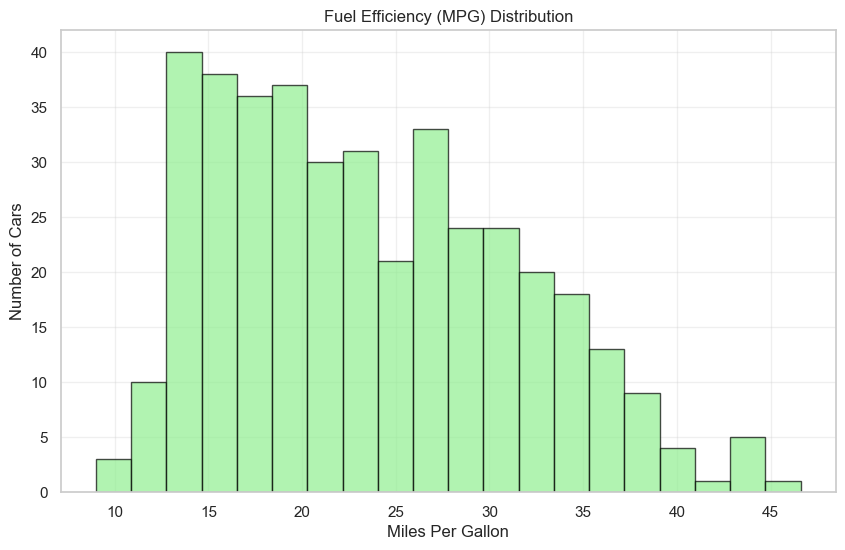

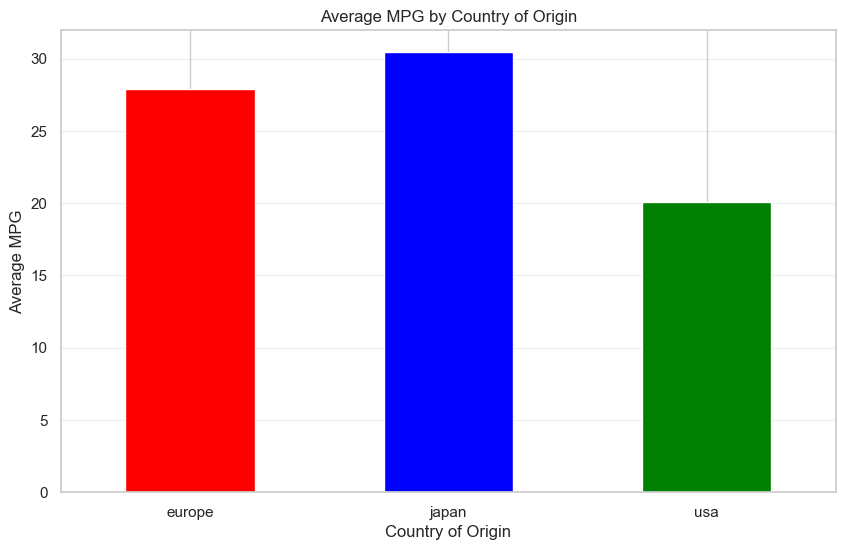

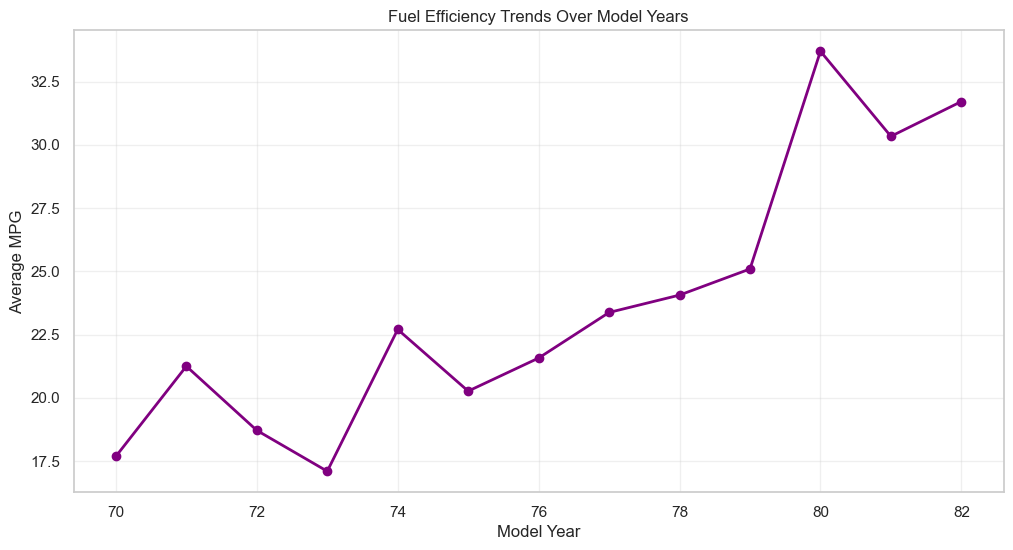

In [5]:
# MPG distribution
plt.figure(figsize=(10, 6))
plt.hist(df['mpg'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Fuel Efficiency (MPG) Distribution")
plt.xlabel("Miles Per Gallon")
plt.ylabel("Number of Cars")
plt.grid(alpha=0.3)
plt.show()

# MPG by origin
plt.figure(figsize=(10, 6))
mpg_by_origin.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Average MPG by Country of Origin")
plt.xlabel("Country of Origin")
plt.ylabel("Average MPG")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

# MPG trends over years
plt.figure(figsize=(12, 6))
mpg_by_year.plot(kind='line', marker='o', color='purple', linewidth=2)
plt.title("Fuel Efficiency Trends Over Model Years")
plt.xlabel("Model Year")
plt.ylabel("Average MPG")
plt.grid(alpha=0.3)
plt.show()

### Insights:
1. MPG distribution shows right skew with most cars in 15-25 mpg range.
2. Japanese cars significantly more fuel efficient than American cars.
3. Clear upward trend in fuel efficiency from 1970 to 1982.
4. 1974 and 1979 show noticeable efficiency improvements.
5. European cars show consistent medium-high efficiency.

### 8. Visualization with Seaborn

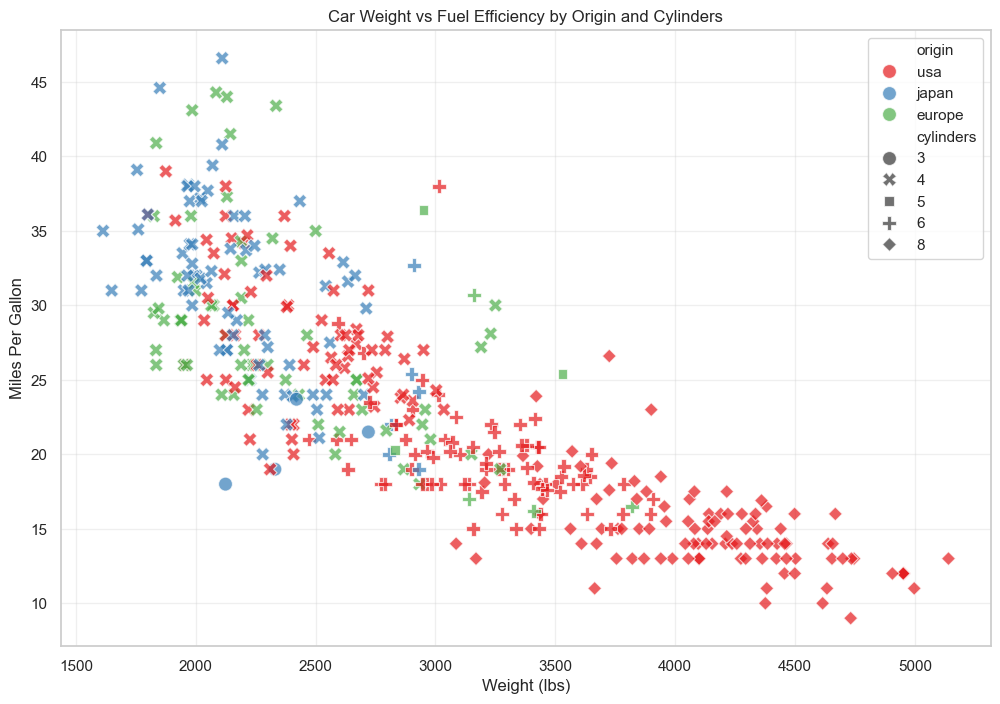

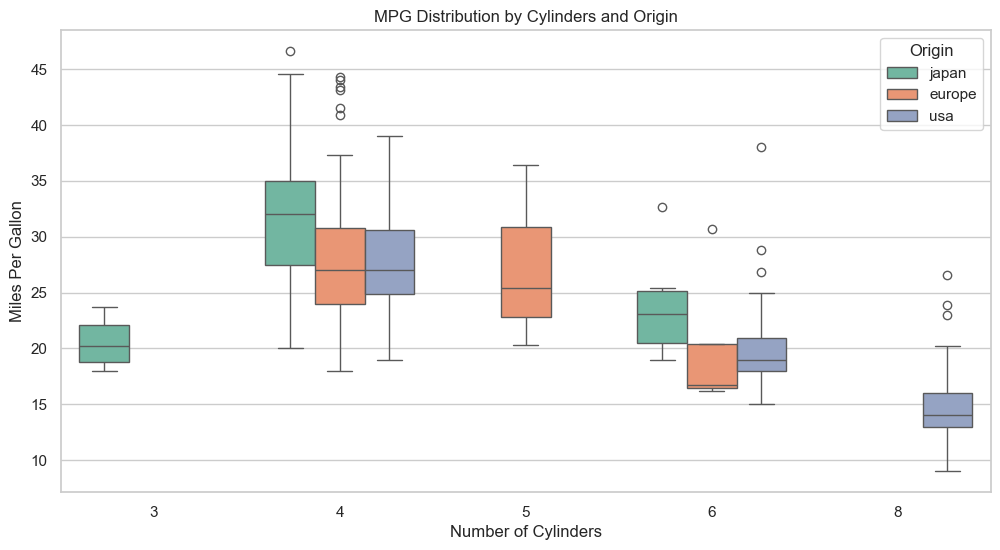

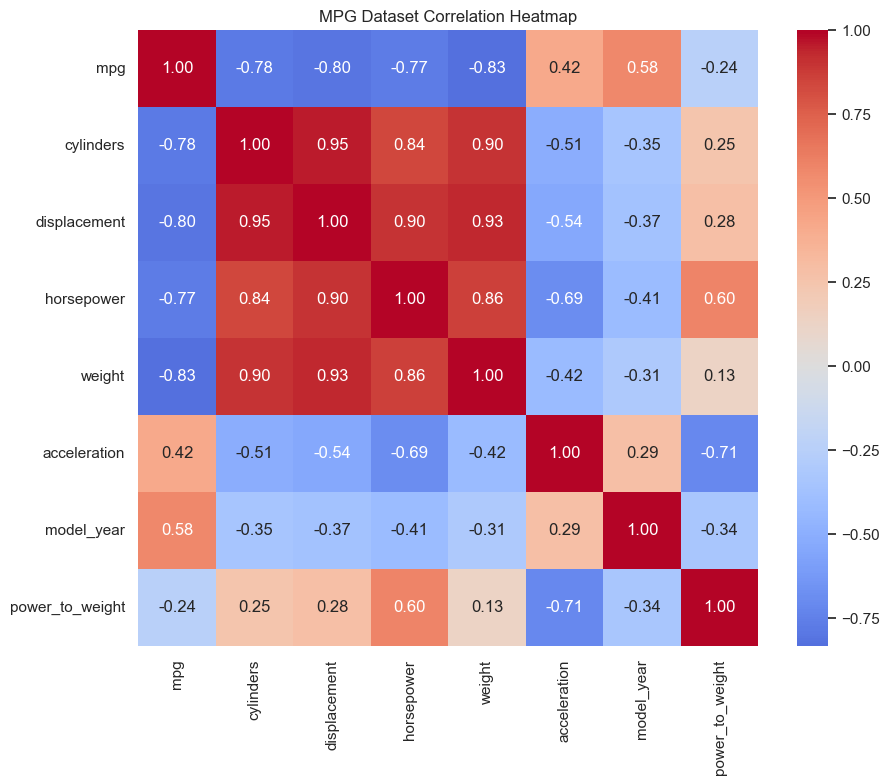

<Figure size 1200x800 with 0 Axes>

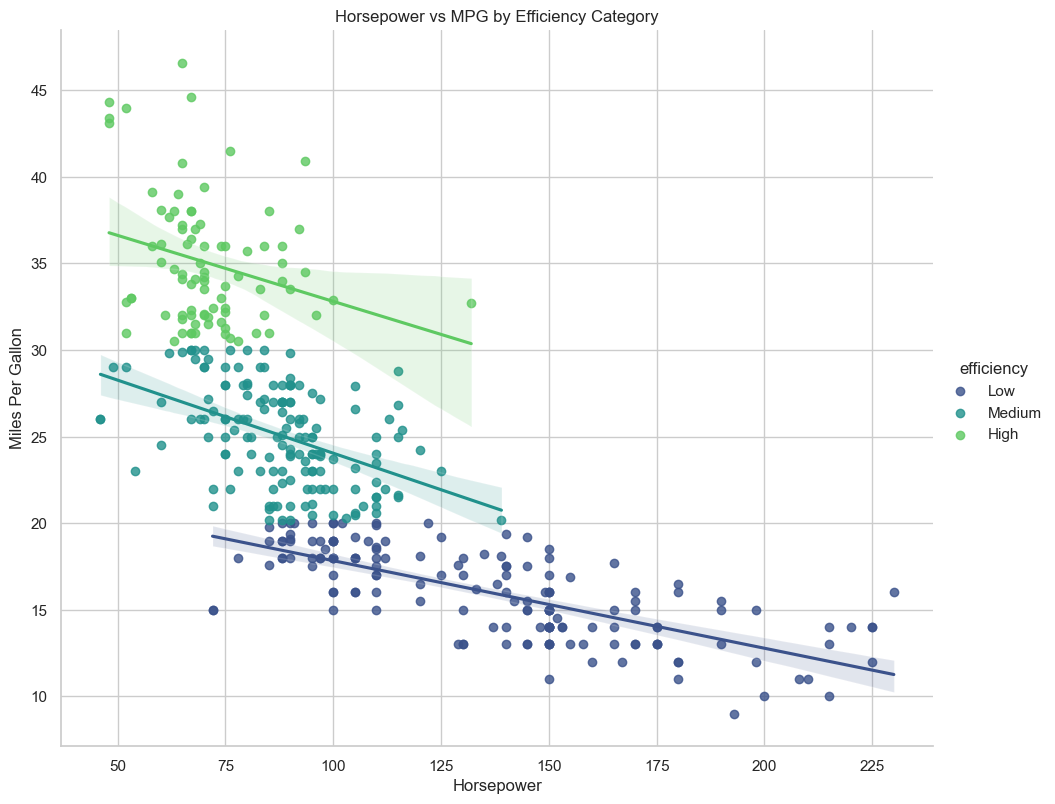

In [6]:
# MPG vs Weight by origin
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='weight', y='mpg', hue='origin', 
                style='cylinders', palette='Set1', s=100, alpha=0.7)
plt.title("Car Weight vs Fuel Efficiency by Origin and Cylinders")
plt.xlabel("Weight (lbs)")
plt.ylabel("Miles Per Gallon")
plt.grid(alpha=0.3)
plt.show()

# MPG by cylinders and origin
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cylinders', y='mpg', hue='origin', palette='Set2')
plt.title("MPG Distribution by Cylinders and Origin")
plt.xlabel("Number of Cylinders")
plt.ylabel("Miles Per Gallon")
plt.legend(title='Origin')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("MPG Dataset Correlation Heatmap")
plt.show()

# Horsepower vs MPG by efficiency
plt.figure(figsize=(12, 8))
sns.lmplot(data=df, x='horsepower', y='mpg', hue='efficiency', 
           palette='viridis', height=8, aspect=1.2)
plt.title("Horsepower vs MPG by Efficiency Category")
plt.xlabel("Horsepower")
plt.ylabel("Miles Per Gallon")
plt.show()

### Insights:
1. Strong inverse relationship between weight and fuel efficiency.
2. Japanese cars dominate high efficiency categories across all weights.
3. American cars tend to be heavier with more cylinders and lower efficiency.
4. Displacement, horsepower, and weight all strongly negatively correlated with MPG.
5. Model year positively correlated with MPG, showing technological improvements.
6. Clear efficiency categories emerge based on weight-horsepower combinations.